In [1]:
import pandas as pd
import json
import  tarfile
import bz2
import os
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk import agreement
import statsmodels.formula.api as smf
sns.set_style('whitegrid')
%matplotlib inline
import random
import math

import multiprocessing
import json
import os
import re
import datetime
import time
import pprint
from datetime import datetime
from datetime import timedelta
import pytz
import glob
from random import sample
import pickle
from datetime import date, timedelta

In [2]:
files = []
for i in range(40):
    files.append("derived_dataset/lengths_derived_dataset_batch_"+str(i+1)+".parquet")

In [3]:
allowed_languages = ['ar',
 'nl',
 'en',
 'et',
 'fr',
 'de',
 'ht',
 'hi',
 'in',
 'it',
 'fa',
 'pl',
 'pt',
 'ru',
 'es',
 'sv',
 'tl',
 'th',
 'tr',
 'ur']

In [4]:
def process_batch(file):
    df = pd.read_parquet(file)
    df = df.loc[df['lang'].isin(allowed_languages)]
    df_stats = df.groupby([df["created_at"].dt.year, df["created_at"].dt.month]).apply(lambda x: pd.Series({
            'histogram_characters': x['n_chars'].value_counts()
            }))
    
    return df_stats

In [5]:
p = multiprocessing.Pool(10)
print('Parallelized on number of cores:',multiprocessing.cpu_count())

start = time.time()

output = p.map(process_batch, files)

p.close()
p.join()

end = time.time()
elapsed = end - start

print('Elapsed time:',time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Parallelized on number of cores: 48
Elapsed time: 00:13:04


In [8]:
dates_dict = {}
counts = []

for item in output:
    for cnt,d in enumerate(item.index):
        if d not in dates_dict.keys():
            dates_dict[d] = {}
            dates_dict[d]['n_char_hist'] = item['histogram_characters'].values[cnt]
        else:  
            dates_dict[d]['n_char_hist'] = dates_dict[d]['n_char_hist'].add(item['histogram_characters'].values[cnt],fill_value=0)


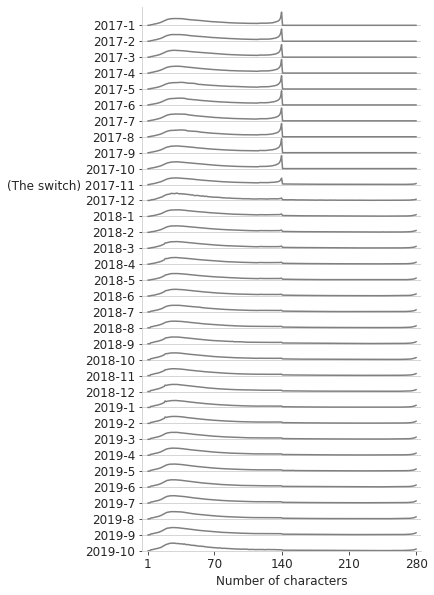

In [35]:
fix, ax = plt.subplots(1,1,figsize = (5,10))


ticks = []
for cnt,key in enumerate(sorted(dates_dict.keys(),reverse = True)):  
    hist = cnt*.022+0.7*np.array([(dates_dict[key]['n_char_hist'][i])/np.nansum(dates_dict[key]['n_char_hist']) \
                              if i in dates_dict[key]['n_char_hist'].index \
                              else 0 \
                              for i in range(1,281)])
   # if cnt == 33:
    #print(np.argmax(np.array([(dates_dict[key]['n_char_hist'][i])/np.nansum(dates_dict[key]['n_char_hist']) \
     #                         if i in dates_dict[key]['n_char_hist'].index \
       #                       else 0 \
       #                       for i in range(1,281)])))
    if cnt > 23:
        c = 'black'
        alpha = (34-cnt)/30+0.6


    elif cnt == 23:
        c = 'black'
        alpha = 0.9

    else:
        c = 'black'
        alpha = cnt/70+0.65

        
    plt.plot(range(1,281),
                 hist,
                 label = key, color = 'gray', linewidth = 1.5)
        
    ticks.append(cnt*.022)
plt.yticks(ticks,["(The switch) 2017-11" if i[1][1] ==11 and i[1][0]==2017 else str(i[1][0])+'-'+str(i[1][1])\
                  for i in \
                  enumerate(sorted(dates_dict.keys(),reverse = True))],  fontsize= 12);



#plt.title('Monthly tweet length histogram', fontsize= 14)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.ylim(ticks[0],ticks[-1]+0.025);
plt.xlim([-5,285])
#ax.get_xaxis().set_visible(False)

plt.xticks(np.concatenate(([1],range(0,281)[::70][1:])), fontsize= 12);
plt.xlabel('Number of characters',  fontsize= 12)

plt.gca().yaxis.grid(True) 
plt.gca().xaxis.grid(False)
plt.savefig("fig1.pdf", bbox_inches='tight')

In [45]:
len(dates_dict)

34